In [1]:
## 1. 라이브러리 읽어 들이기 ##

# 텐서플로 라이브러리
import tensorflow as tf
# tflearn 라이브러리
import tflearn

# MNIST 데이터 세트를 다루기 위한 라이브러리
import tflearn.datasets.mnist as mnist

# MNIST 이미지를 출력하기 위한 라이브러리
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

In [3]:
## 2. 데이터 읽어 들이고 전처리하기 ##
# MNIST 데이터를 ./data/mnist에 내려받고, 압축을 해제한 다음 각 변수에 할당하기
trainX, trainY, testX, testY = mnist.load_data('./data/mnist/', one_hot=True)

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
## 데이터 확인하기
# 학습 전용 이미지 픽셀 데이터와 정답 데이터의 크기 확인하기
print(len(trainX),len(trainY))

# 테스트 전용 이미지 픽셀 데이터와 정답 데이터의 크기 확인하기
print(len(testX),len(testY))

# 학습 전용 이미지 픽셀 데이터 확인하기
print(trainX)

# 학습 전용 정답 데이터 확인하기
print(trainY)

55000 55000
10000 10000
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [5]:
# 학습 전용 이미지 픽셀 데이터 확인하기
trainX[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

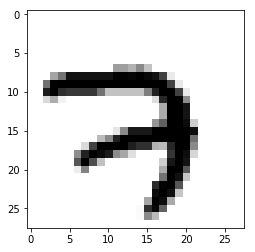

In [6]:
# 학습 전용 이미지 데이터 확인하기
plt.imshow(trainX[0].reshape(28, 28), cmap=cm.gray_r, interpolation='nearest')
plt.show()

In [7]:
# 학습 전용 정답 데이터 확인하기
trainY[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [8]:
## 3. 신경망 만들기

## 초기화하기
tf.reset_default_graph()

## 입력 레이어 만들기
net = tflearn.input_data(shape=[None, 784])

## 중간 레이어 만들기
net = tflearn.fully_connected(net, 128, activation='relu')
net = tflearn.dropout(net, 0.5)

## 출력 레이어 만들기
net = tflearn.fully_connected(net, 10, activation='softmax')
net = tflearn.regression(net, optimizer='sgd', learning_rate=0.5, loss='categorical_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
## 4. 모델 만들기(학습) ##
# 학습하기
model = tflearn.DNN(net)
model.fit(trainX, trainY, n_epoch=20, batch_size=100, validation_set=0.1, show_metric=True)

Training Step: 9899  | total loss: 0.61764 | time: 1.750s
| SGD | epoch: 020 | loss: 0.61764 - acc: 0.9167 -- iter: 49400/49500
Training Step: 9900  | total loss: 0.56939 | time: 2.768s
| SGD | epoch: 020 | loss: 0.56939 - acc: 0.9210 | val_loss: 0.08739 - val_acc: 0.9749 -- iter: 49500/49500
--


In [10]:
## 5. 모델 적용(예측) ##
pred = np.array(model.predict(testX)).argmax(axis=1)
print(pred)

label = testY.argmax(axis=1)
print(label)

accuracy = np.mean(pred == label, axis=0)
print(accuracy)

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
0.9755
